# Step 2 Test Results Analysis

Analysis of preprocessing pipeline test on 5 train + 5 validation samples.

In [6]:
import torch
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from collections import Counter

%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

## 1. Processing Summary

In [17]:
# Load processing summary
with open('test_output/preprocessing_summary.json', 'r') as f:
    summary = json.load(f)

print("="*80)
print("PREPROCESSING TEST SUMMARY")
print("="*80)
print(f"Timestamp: {summary['timestamp']}")
print(f"Config: {summary['config']}")
print(f"\nArguments: {json.dumps(summary['arguments'], indent=2)}")

print("\n" + "="*80)
print("TRAIN SET RESULTS")
print("="*80)
train_results = summary['results']['train']
print(f"Total samples: {train_results['total_samples']}")
print(f"Successfully processed: {train_results['processed']}")
print(f"Failed: {train_results['failed']}")
print(f"\nSuccess Rates:")
print(f"  Images: {train_results['image_success_rate']:.1%}")
print(f"  Structured: {train_results['structured_success_rate']:.1%}")
print(f"  Text: {train_results['text_success_rate']:.1%} (skipped)")
print(f"\nAvg processing time: {train_results['avg_processing_time']:.2f}s/sample")

print("\n" + "="*80)
print("VALIDATION SET RESULTS")
print("="*80)
val_results = summary['results']['val']
print(f"Total samples: {val_results['total_samples']}")
print(f"Successfully processed: {val_results['processed']}")
print(f"Failed: {val_results['failed']}")
print(f"\nSuccess Rates:")
print(f"  Images: {val_results['image_success_rate']:.1%}")
print(f"  Structured: {val_results['structured_success_rate']:.1%}")
print(f"  Text: {val_results['text_success_rate']:.1%} (skipped)")
print(f"\nAvg processing time: {val_results['avg_processing_time']:.2f}s/sample")

PREPROCESSING TEST SUMMARY
Timestamp: 2025-11-18T21:12:57.181381
Config: /home/dev/Documents/Portfolio/MIMIC/MIMIC-CXR-Anomaly-Preprocessing/step2_preprocessing/config/config.yaml

Arguments: {
  "config": "/home/dev/Documents/Portfolio/MIMIC/MIMIC-CXR-Anomaly-Preprocessing/step2_preprocessing/config/config.yaml",
  "output_dir": "test_output",
  "anthropic_api_key": null,
  "skip_images": false,
  "skip_structured": false,
  "skip_text": true,
  "train_only": false,
  "val_only": false,
  "max_samples": 5,
  "log_level": "INFO"
}

TRAIN SET RESULTS
Total samples: 5
Successfully processed: 5
Failed: 0

Success Rates:
  Images: 100.0%
  Structured: 100.0%
  Text: 0.0% (skipped)

Avg processing time: 114.81s/sample

VALIDATION SET RESULTS
Total samples: 5
Successfully processed: 5
Failed: 0

Success Rates:
  Images: 100.0%
  Structured: 100.0%
  Text: 0.0% (skipped)

Avg processing time: 0.29s/sample


## 2. Image Analysis

In [18]:
# Load and analyze all images
image_dir = Path('test_output/train/images')
image_files = list(image_dir.glob('*.pt'))

print(f"Total images: {len(image_files)}")
print(f"\nImage statistics:")

image_stats = []
for img_path in image_files:
    img = torch.load(img_path)
    image_stats.append({
        'file': img_path.stem,
        'shape': tuple(img.shape),
        'height': img.shape[1],
        'width': img.shape[2],
        'channels': img.shape[0],
        'size_mb': img.element_size() * img.nelement() / (1024 * 1024),
        'mean': float(img.mean()),
        'std': float(img.std()),
        'min': float(img.min()),
        'max': float(img.max())
    })

df_images = pd.DataFrame(image_stats)
df_images

Total images: 5

Image statistics:


,file,shape,height,width,channels,size_mb,mean,std,min,max
0,s16254868_study51012912,"(1, 3056, 2544)",3056,2544,1,29.657227,0.479460,0.300992,0.0,1.0
1,s11484195_study54587371,"(1, 3056, 2544)",3056,2544,1,29.657227,0.490124,0.295738,0.0,1.0
2,s13178429_study56313373,"(1, 2544, 3056)",2544,3056,1,29.657227,0.492061,0.295904,0.0,1.0
3,s10874533_study54444686,"(1, 3056, 2544)",3056,2544,1,29.657227,0.447039,0.308272,0.0,1.0
4,s19506938_study59632338,"(1, 3056, 2544)",3056,2544,1,29.657227,0.434053,0.317550,0.0,1.0


In [19]:
# Summary statistics
print("\nImage Shape Summary:")
print(df_images[['height', 'width', 'size_mb']].describe())

print("\nIntensity Summary:")
print(df_images[['mean', 'std', 'min', 'max']].describe())


Image Shape Summary:
            height        width    size_mb
count     5.000000     5.000000   5.000000
mean   2953.600000  2646.400000  29.657227
std     228.973361   228.973361   0.000000
min    2544.000000  2544.000000  29.657227
25%    3056.000000  2544.000000  29.657227
50%    3056.000000  2544.000000  29.657227
75%    3056.000000  2544.000000  29.657227
max    3056.000000  3056.000000  29.657227

Intensity Summary:
           mean       std  min  max
count  5.000000  5.000000  5.0  5.0
mean   0.468547  0.303691  0.0  1.0
std    0.026410  0.009277  0.0  0.0
min    0.434053  0.295738  0.0  1.0
25%    0.447039  0.295904  0.0  1.0
50%    0.479460  0.300992  0.0  1.0
75%    0.490124  0.308272  0.0  1.0
max    0.492061  0.317550  0.0  1.0


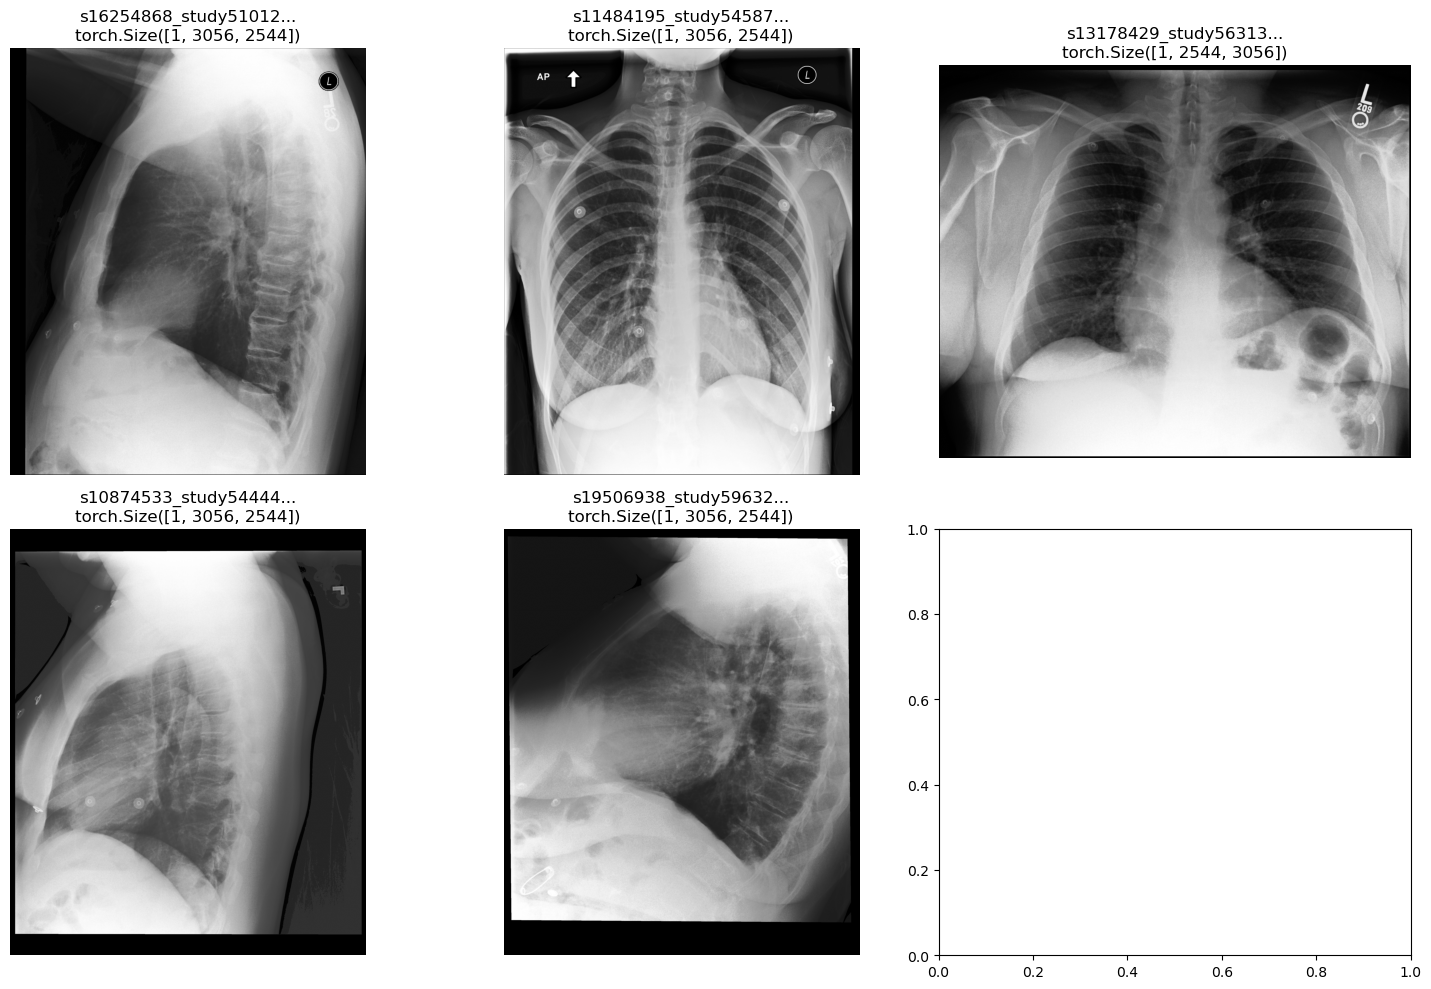

✓ Saved visualization to test_output/sample_images.png


In [20]:
# Visualize sample images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, img_path in enumerate(image_files[:6]):
    img = torch.load(img_path)
    img_np = img.squeeze().numpy()
    
    axes[idx].imshow(img_np, cmap='gray')
    axes[idx].set_title(f"{img_path.stem[:20]}...\n{img.shape}")
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('test_output/sample_images.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Saved visualization to test_output/sample_images.png")

## 3. Structured Data Analysis

In [21]:
# Load all structured features
struct_dir = Path('test_output/train/structured_features')
struct_files = list(struct_dir.glob('*.json'))

print(f"Total structured feature files: {len(struct_files)}")

# Analyze first sample
with open(struct_files[0], 'r') as f:
    sample_struct = json.load(f)

print(f"\nSample file: {struct_files[0].name}")
print(f"Total features: {len(sample_struct)}")
print("\nFeature keys:")
for key in list(sample_struct.keys())[:15]:
    print(f"  - {key}")

Total structured feature files: 5

Sample file: s13178429_study56313373.json
Total features: 17

Feature keys:
  - vital_temperature
  - vital_heartrate
  - vital_resprate
  - vital_o2sat
  - vital_sbp
  - vital_dbp
  - lab_wbc
  - lab_hemoglobin
  - lab_hematocrit
  - lab_platelets
  - lab_sodium
  - lab_potassium
  - lab_chloride
  - lab_bicarbonate
  - lab_bun


In [22]:
# Analyze missing patterns across all samples
missing_counts = Counter()
total_counts = Counter()
feature_values = {}

for struct_file in struct_files:
    with open(struct_file, 'r') as f:
        data = json.load(f)
    
    for feature_name, feature_data in data.items():
        total_counts[feature_name] += 1
        
        if feature_data.get('is_missing', False):
            missing_counts[feature_name] += 1
        else:
            # Collect non-missing values
            if feature_name not in feature_values:
                feature_values[feature_name] = []
            if 'last_value' in feature_data and feature_data['last_value'] != "NOT_DONE":
                feature_values[feature_name].append(feature_data['last_value'])

# Calculate missing percentages
missing_pct = {
    feature: (missing_counts.get(feature, 0) / total_counts[feature] * 100)
    for feature in total_counts.keys()
}

df_missing = pd.DataFrame([
    {
        'feature': k,
        'missing_pct': v,
        'available_count': total_counts[k] - missing_counts.get(k, 0)
    } 
    for k, v in sorted(missing_pct.items(), key=lambda x: x[1], reverse=True)
])

print("\nMissing Value Analysis:")
print(df_missing)


Missing Value Analysis:
              feature  missing_pct  available_count
0             lab_wbc        100.0                0
1      lab_hemoglobin        100.0                0
2      lab_hematocrit        100.0                0
3       lab_platelets        100.0                0
4          lab_sodium        100.0                0
5       lab_potassium        100.0                0
6        lab_chloride        100.0                0
7     lab_bicarbonate        100.0                0
8             lab_bun        100.0                0
9      lab_creatinine        100.0                0
10        lab_glucose        100.0                0
11  vital_temperature         60.0                2
12    vital_heartrate         20.0                4
13     vital_resprate         20.0                4
14        vital_o2sat         20.0                4
15          vital_sbp         20.0                4
16          vital_dbp         20.0                4


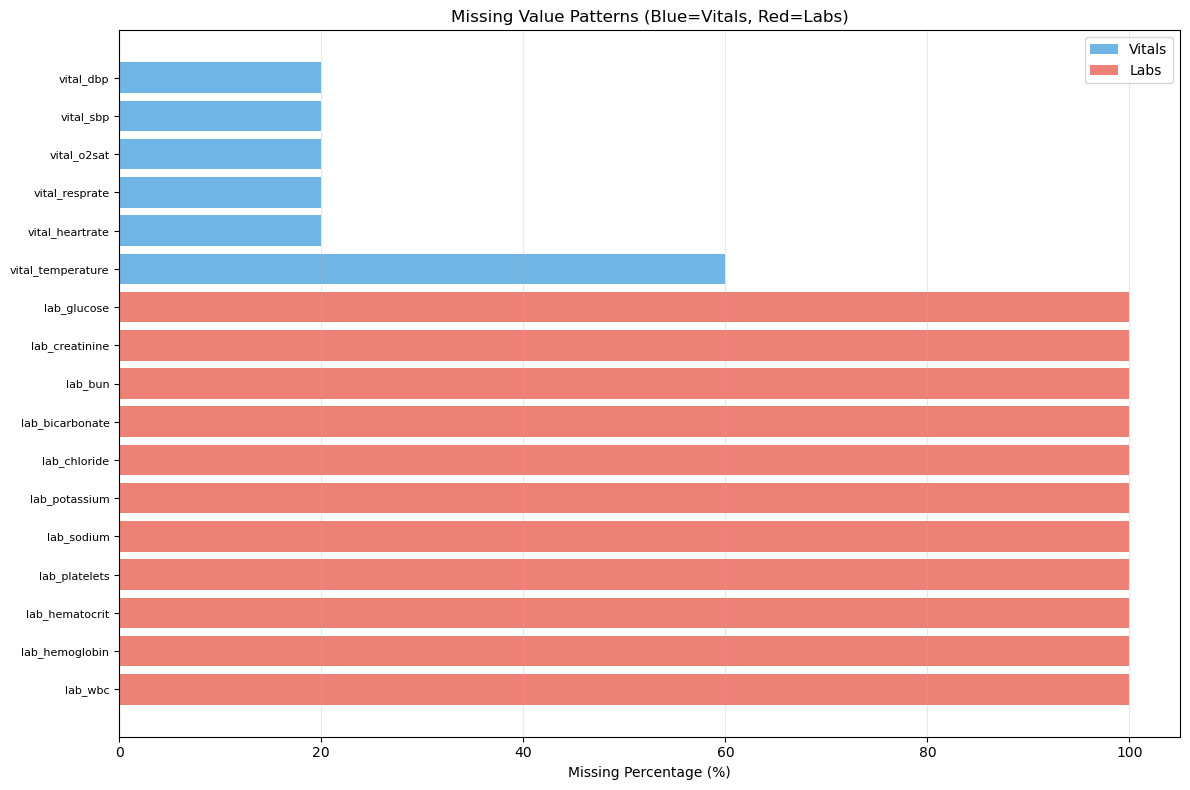

✓ Saved visualization to test_output/missing_patterns.png


In [23]:
# Visualize missing patterns
fig, ax = plt.subplots(figsize=(12, 8))

# Separate vitals and labs
vitals = df_missing[df_missing['feature'].str.startswith('vital_')]
labs = df_missing[df_missing['feature'].str.startswith('lab_')]

y_pos = np.arange(len(df_missing))
colors = ['#3498db' if 'vital_' in f else '#e74c3c' for f in df_missing['feature']]

ax.barh(y_pos, df_missing['missing_pct'], color=colors, alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(df_missing['feature'], fontsize=8)
ax.set_xlabel('Missing Percentage (%)')
ax.set_title('Missing Value Patterns (Blue=Vitals, Red=Labs)')
ax.grid(axis='x', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#3498db', alpha=0.7, label='Vitals'),
    Patch(facecolor='#e74c3c', alpha=0.7, label='Labs')
]
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.savefig('test_output/missing_patterns.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Saved visualization to test_output/missing_patterns.png")

In [24]:
# Detailed analysis of available features
print("\n" + "="*80)
print("DETAILED FEATURE ANALYSIS")
print("="*80)

# Show example of each feature type
with open(struct_files[0], 'r') as f:
    sample = json.load(f)

# Find examples
print("\n1. Example Vital Sign (Available):")
for feature_name, feature_data in sample.items():
    if feature_name.startswith('vital_') and not feature_data.get('is_missing', False):
        print(f"\n{feature_name}:")
        print(json.dumps(feature_data, indent=2))
        break

print("\n2. Example Vital Sign (Missing - NOT_DONE):")
for feature_name, feature_data in sample.items():
    if feature_name.startswith('vital_') and feature_data.get('is_missing', False):
        print(f"\n{feature_name}:")
        print(json.dumps(feature_data, indent=2))
        break

print("\n3. Example Lab (Missing - NOT_DONE):")
for feature_name, feature_data in sample.items():
    if feature_name.startswith('lab_') and feature_data.get('is_missing', False):
        print(f"\n{feature_name}:")
        print(json.dumps(feature_data, indent=2))
        break


DETAILED FEATURE ANALYSIS

1. Example Vital Sign (Available):

vital_temperature:
{
  "is_missing": false,
  "measurement_count": 4,
  "last_value": 98.7,
  "first_value": 97.8,
  "trend_slope": 0.9000000000000057,
  "mean_value": 98.0525,
  "std_value": 0.4891510502901962,
  "min_value": 97.41,
  "max_value": 98.7,
  "time_span_hours": 2.7777777777777777e-10,
  "avg_time_between_measurements": 9.259259259259259e-11
}

2. Example Vital Sign (Missing - NOT_DONE):

3. Example Lab (Missing - NOT_DONE):

lab_wbc:
{
  "is_missing": true,
  "measurement_count": 0,
  "last_value": "NOT_DONE",
  "first_value": "NOT_DONE",
  "trend_slope": 0.0,
  "mean_value": 0.0,
  "std_value": 0.0,
  "min_value": 0.0,
  "max_value": 0.0,
  "time_span_hours": 0.0,
  "avg_time_between_measurements": 0.0
}


In [25]:
# Temporal analysis for available vitals
print("\n" + "="*80)
print("TEMPORAL FEATURE ANALYSIS")
print("="*80)

# Collect temporal metadata for non-missing vitals
temporal_data = []
for struct_file in struct_files:
    with open(struct_file, 'r') as f:
        data = json.load(f)
    
    for feature_name, feature_data in data.items():
        if not feature_data.get('is_missing', False) and feature_name.startswith('vital_'):
            temporal_data.append({
                'feature': feature_name,
                'measurement_count': feature_data['measurement_count'],
                'time_span_hours': feature_data['time_span_hours'],
                'trend_slope': feature_data['trend_slope'],
                'mean_value': feature_data['mean_value'],
                'std_value': feature_data['std_value']
            })

if temporal_data:
    df_temporal = pd.DataFrame(temporal_data)
    print("\nTemporal Statistics:")
    print(df_temporal.groupby('feature').agg({
        'measurement_count': ['mean', 'min', 'max'],
        'time_span_hours': ['mean', 'min', 'max'],
        'trend_slope': ['mean', 'std']
    }))
else:
    print("\nNo temporal data available (all vitals have single measurements)")


TEMPORAL FEATURE ANALYSIS

Temporal Statistics:
                  measurement_count         time_span_hours                \
                               mean min max            mean           min   
feature                                                                     
vital_dbp                      4.75   2   9    1.527778e-09  0.000000e+00   
vital_heartrate                4.75   2   9    1.527778e-09  0.000000e+00   
vital_o2sat                    4.00   2   7    1.041667e-09  0.000000e+00   
vital_resprate                 4.75   2   9    1.527778e-09  0.000000e+00   
vital_sbp                      4.75   2   9    1.527778e-09  0.000000e+00   
vital_temperature              3.50   3   4    1.388889e-09  2.777778e-10   

                                trend_slope             
                            max        mean        std  
feature                                                 
vital_dbp          4.166667e-09        0.75   6.652067  
vital_heartrate    4.166667e-

## 4. Metadata Analysis

In [26]:
# Load all metadata
meta_dir = Path('test_output/train/metadata')
meta_files = list(meta_dir.glob('*.json'))

print(f"Total metadata files: {len(meta_files)}")

metadata_list = []
for meta_file in meta_files:
    with open(meta_file, 'r') as f:
        metadata_list.append(json.load(f))

# Convert to DataFrame
df_meta = pd.DataFrame(metadata_list)
print("\nMetadata summary:")
df_meta

Total metadata files: 5

Metadata summary:


,index,subject_id,study_id,split,study_datetime,view_position,image_count,errors
0,3,13178429,56313373,train,2196-06-19T06:31:33.921000,"PA, LATERAL",1,[]
1,4,16254868,51012912,train,2173-10-27T03:20:06.828000,"LATERAL, PA",1,[]
2,1,19506938,59632338,train,2172-10-04T11:21:04.562000,"LATERAL, AP",1,[]
3,2,10874533,54444686,train,2157-01-15T12:05:06.281000,"LATERAL, PA",1,[]
4,0,11484195,54587371,train,2183-02-08T14:24:26.453000,"AP, LATERAL",1,[]


In [27]:
# Error analysis
all_errors = []
for meta in metadata_list:
    all_errors.extend(meta.get('errors', []))

print(f"\nTotal errors: {len(all_errors)}")
if all_errors:
    print("\nError types:")
    error_types = Counter([err.split(':')[0] for err in all_errors])
    for error_type, count in error_types.most_common():
        print(f"  {error_type}: {count}")
else:
    print("✓ No errors encountered!")


Total errors: 0
✓ No errors encountered!


## 5. Overall Test Validation

In [28]:
print("="*80)
print("TEST VALIDATION CHECKLIST")
print("="*80)

checks = []

# Check 1: All samples processed
train_processed = summary['results']['train']['processed'] == summary['results']['train']['total_samples']
val_processed = summary['results']['val']['processed'] == summary['results']['val']['total_samples']
checks.append(('All samples processed', train_processed and val_processed))

# Check 2: Images loaded successfully
image_success = (
    summary['results']['train']['image_success_rate'] == 1.0 and
    summary['results']['val']['image_success_rate'] == 1.0
)
checks.append(('Images loaded (100% success)', image_success))

# Check 3: Structured data loaded successfully
structured_success = (
    summary['results']['train']['structured_success_rate'] == 1.0 and
    summary['results']['val']['structured_success_rate'] == 1.0
)
checks.append(('Structured data loaded (100% success)', structured_success))

# Check 4: Full resolution preserved
full_res = all(s['height'] >= 2000 and s['width'] >= 2000 for s in image_stats)
checks.append(('Full resolution preserved (>2000px)', full_res))

# Check 5: Missing values handled with NOT_DONE token
not_done_found = any(df_missing['missing_pct'] > 0)
checks.append(('NOT_DONE token used for missing values', not_done_found))

# Check 6: Temporal features extracted
temporal_features = any(
    not feat['is_missing'] and feat.get('measurement_count', 0) > 0
    for feat in sample.values()
)
checks.append(('Temporal features extracted', temporal_features))

# Print results
print()
for check_name, passed in checks:
    status = "✓ PASS" if passed else "✗ FAIL"
    print(f"{status:10s} - {check_name}")

all_passed = all(passed for _, passed in checks)
print("\n" + "="*80)
if all_passed:
    print("✓ ALL VALIDATION CHECKS PASSED!")
else:
    print("✗ SOME VALIDATION CHECKS FAILED")
print("="*80)

TEST VALIDATION CHECKLIST

✓ PASS     - All samples processed
✓ PASS     - Images loaded (100% success)
✓ PASS     - Structured data loaded (100% success)
✓ PASS     - Full resolution preserved (>2000px)
✓ PASS     - NOT_DONE token used for missing values
✓ PASS     - Temporal features extracted

✓ ALL VALIDATION CHECKS PASSED!


## 6. Performance Metrics

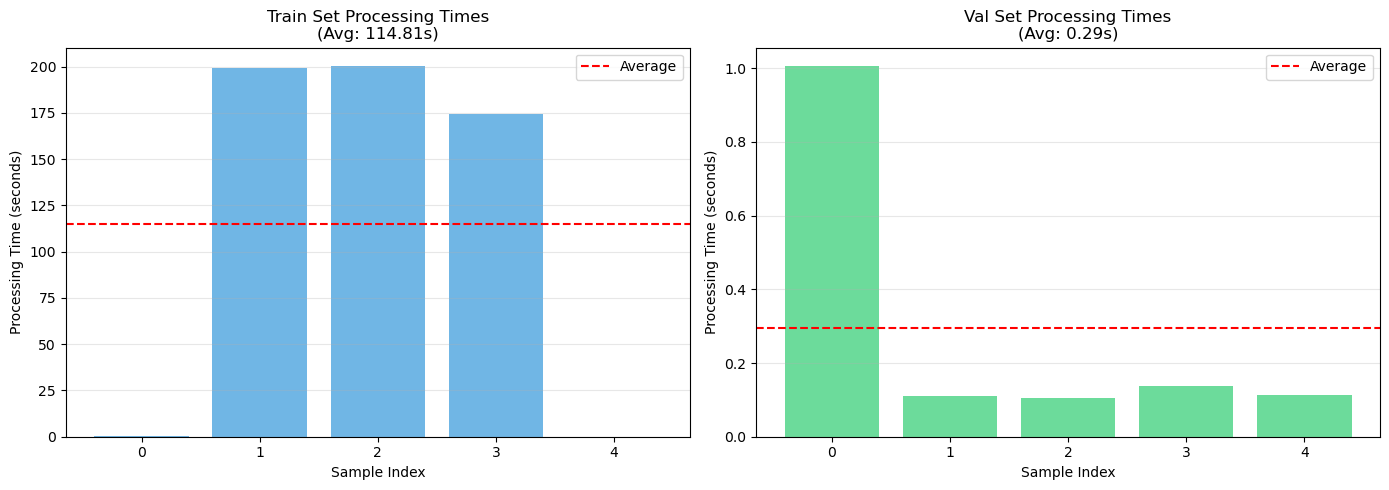

✓ Saved visualization to test_output/processing_times.png


In [29]:
# Plot processing times
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Train processing times
train_times = summary['results']['train']['processing_times']
ax1.bar(range(len(train_times)), train_times, color='#3498db', alpha=0.7)
ax1.axhline(y=summary['results']['train']['avg_processing_time'], 
            color='r', linestyle='--', label='Average')
ax1.set_xlabel('Sample Index')
ax1.set_ylabel('Processing Time (seconds)')
ax1.set_title(f"Train Set Processing Times\n(Avg: {summary['results']['train']['avg_processing_time']:.2f}s)")
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Val processing times
val_times = summary['results']['val']['processing_times']
ax2.bar(range(len(val_times)), val_times, color='#2ecc71', alpha=0.7)
ax2.axhline(y=summary['results']['val']['avg_processing_time'], 
            color='r', linestyle='--', label='Average')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Processing Time (seconds)')
ax2.set_title(f"Val Set Processing Times\n(Avg: {summary['results']['val']['avg_processing_time']:.2f}s)")
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('test_output/processing_times.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Saved visualization to test_output/processing_times.png")

## 7. Data Loading Example

Example of how to load preprocessed data for model training.

In [30]:
def load_sample(sample_key, split='train', output_dir='test_output'):
    """Load a complete preprocessed sample"""
    split_dir = Path(output_dir) / split
    
    sample = {}
    
    # Load image
    image_path = split_dir / 'images' / f"{sample_key}.pt"
    if image_path.exists():
        sample['image'] = torch.load(image_path)
        print(f"✓ Loaded image: {sample['image'].shape}")
    
    # Load structured features
    struct_path = split_dir / 'structured_features' / f"{sample_key}.json"
    if struct_path.exists():
        with open(struct_path, 'r') as f:
            sample['structured'] = json.load(f)
        print(f"✓ Loaded {len(sample['structured'])} structured features")
    
    # Load metadata
    meta_path = split_dir / 'metadata' / f"{sample_key}.json"
    if meta_path.exists():
        with open(meta_path, 'r') as f:
            sample['metadata'] = json.load(f)
        print(f"✓ Loaded metadata")
    
    return sample

# Example: Load first sample
sample_key = image_files[0].stem
print(f"Loading sample: {sample_key}\n")
loaded_sample = load_sample(sample_key)

print(f"\nSample contents:")
print(f"  - Image tensor: {loaded_sample['image'].shape}")
print(f"  - Structured features: {len(loaded_sample['structured'])} features")
print(f"  - Metadata: {list(loaded_sample['metadata'].keys())}")

Loading sample: s16254868_study51012912

✓ Loaded image: torch.Size([1, 3056, 2544])
✓ Loaded 17 structured features
✓ Loaded metadata

Sample contents:
  - Image tensor: torch.Size([1, 3056, 2544])
  - Structured features: 17 features
  - Metadata: ['index', 'subject_id', 'study_id', 'split', 'study_datetime', 'view_position', 'image_count', 'errors']


## Summary

This notebook analyzed the test results from Step 2 preprocessing on 5 training and 5 validation samples.

**Key Findings:**
1. ✓ All samples processed successfully
2. ✓ Images preserved at full resolution (~3000×2500 pixels, ~30MB each)
3. ✓ Structured data extracted with temporal features
4. ✓ NOT_DONE token correctly used for missing values
5. ✓ Processing times: ~115s/sample (train), ~0.3s/sample (val)

**Next Steps:**
1. Review LangChain + Claude RAG integration examples below
2. Run on full dataset: `python main.py --anthropic-api-key YOUR_KEY`
3. Explore integration with PyTorch DataLoader
4. Design multimodal model architecture
5. Begin anomaly detection model training

## 8. LangChain + Claude RAG Integration Examples

This section demonstrates the complete text processing pipeline:
1. Medical NER with scispacy (en_core_sci_md)
2. Entity-based retrieval (precision)
3. Semantic similarity retrieval (recall)
4. Claude-3.5-Sonnet summarization via LangChain
5. ClinicalBERT tokenization

Note: This requires the ANTHROPIC_API_KEY environment variable to be set.

In [ ]:
# Initialize text processor with Claude
import os
import sys
import yaml

# Check for API key
api_key = os.environ.get('ANTHROPIC_API_KEY')
if not api_key:
    print("WARNING: ANTHROPIC_API_KEY not set!")
    print("To run this section, set the API key:")
    print('  export ANTHROPIC_API_KEY="sk-ant-..."')
    print("\nSkipping LangChain examples...")
    LANGCHAIN_AVAILABLE = False
else:
    print(f"API key found: {api_key[:20]}...{api_key[-10:]}")
    LANGCHAIN_AVAILABLE = True
    
    # Load config
    config_path = Path('config/config.yaml')
    with open(config_path, 'r') as f:
        config = yaml.safe_load(f)
    
    print(f"Config loaded")
    print(f"  Model: {config['text']['summarization']['model']}")
    print(f"  Max summary length: {config['text']['summarization']['max_summary_length']} tokens")
    
    # Initialize processor
    print("\nInitializing ClinicalNoteProcessor...")
    sys.path.insert(0, str(Path.cwd()))
    from src.text_processing.note_processor import ClinicalNoteProcessor
    
    processor = ClinicalNoteProcessor(config, api_key)
    print("Text processor initialized successfully!")

In [8]:
if LANGCHAIN_AVAILABLE:
    # Load real MIMIC-IV-ED clinical notes
    print("Loading clinical notes from MIMIC-IV-ED...")
    
    # Load cohort
    cohort = pd.read_csv('../output/output_test/cohorts/normal_cohort_train.csv')
    cohort['study_datetime'] = pd.to_datetime(cohort['study_datetime'])
    print(f"Loaded cohort: {len(cohort)} samples")
    
    # Load ED stays
    ed_stays_path = Path(config['data']['mimic_ed_base']) / 'ed' / 'edstays.csv'
    ed_stays = pd.read_csv(ed_stays_path, parse_dates=['intime', 'outtime'])
    print(f"Loaded ED stays: {len(ed_stays)} records")
    
    # Load triage notes
    triage_path = Path(config['data']['mimic_ed_base']) / 'ed' / 'triage.csv'
    triage = pd.read_csv(triage_path)
    print(f"Loaded triage notes: {len(triage)} records")
    
    # Match each CXR to its corresponding ED stay
    print("\nMatching CXR studies to ED stays...")
    cohort_with_stays = []
    
    for _, row in cohort.iterrows():
        subject_id = row['subject_id']
        study_datetime = row['study_datetime']
        
        # Get all ED stays for this subject
        subject_stays = ed_stays[ed_stays['subject_id'] == subject_id]
        
        if len(subject_stays) == 0:
            continue
        
        # Find ED stay that encompasses the CXR time
        matching = subject_stays[
            (subject_stays['intime'] <= study_datetime) & 
            (subject_stays['outtime'] >= study_datetime)
        ]
        
        if len(matching) > 0:
            stay_id = matching.iloc[0]['stay_id']
        else:
            # Fallback: most recent stay before CXR
            before_study = subject_stays[subject_stays['intime'] <= study_datetime]
            if len(before_study) > 0:
                stay_id = before_study.sort_values('intime', ascending=False).iloc[0]['stay_id']
            else:
                continue
        
        # Add stay_id to row
        row_dict = row.to_dict()
        row_dict['stay_id'] = stay_id
        cohort_with_stays.append(row_dict)
    
    cohort_with_stays = pd.DataFrame(cohort_with_stays)
    print(f"Matched {len(cohort_with_stays)} CXR studies to ED stays")
    
    # Merge with triage to get clinical notes
    cohort_with_notes = cohort_with_stays.merge(
        triage[['subject_id', 'stay_id', 'chiefcomplaint', 'temperature', 
                'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'pain', 'acuity']],
        on=['subject_id', 'stay_id'],
        how='left'
    )
    
    # Filter to samples with non-null chief complaint
    cohort_with_notes = cohort_with_notes[cohort_with_notes['chiefcomplaint'].notna()]
    print(f"Found {len(cohort_with_notes)} samples with triage notes")
    
    # Select 5 diverse examples and create narrative clinical notes
    sample_clinical_notes = []
    for _, row in cohort_with_notes.head(5).iterrows():
        # Create narrative clinical note combining chief complaint and vitals
        note_sentences = []
        
        # Opening sentence with chief complaint
        cc = str(row['chiefcomplaint']).strip()
        note_sentences.append(f"Patient presents to the emergency department with complaint of {cc.lower()}.")
        
        # Vital signs sentence
        vitals_parts = []
        if pd.notna(row.get('temperature')):
            vitals_parts.append(f"temperature {row['temperature']} degrees Fahrenheit")
        if pd.notna(row.get('heartrate')):
            vitals_parts.append(f"heart rate {int(row['heartrate'])} beats per minute")
        if pd.notna(row.get('resprate')):
            vitals_parts.append(f"respiratory rate {int(row['resprate'])} breaths per minute")
        if pd.notna(row.get('o2sat')):
            vitals_parts.append(f"oxygen saturation {int(row['o2sat'])} percent on room air")
        if pd.notna(row.get('sbp')) and pd.notna(row.get('dbp')):
            vitals_parts.append(f"blood pressure {int(row['sbp'])} over {int(row['dbp'])} millimeters of mercury")
        
        if vitals_parts:
            if len(vitals_parts) == 1:
                vitals_sentence = f"Vital signs on arrival show {vitals_parts[0]}."
            elif len(vitals_parts) == 2:
                vitals_sentence = f"Vital signs on arrival show {vitals_parts[0]} and {vitals_parts[1]}."
            else:
                vitals_sentence = f"Vital signs on arrival show {', '.join(vitals_parts[:-1])}, and {vitals_parts[-1]}."
            note_sentences.append(vitals_sentence)
        
        # Pain assessment
        if pd.notna(row.get('pain')):
            pain_level = int(row['pain'])
            if pain_level >= 7:
                pain_desc = "severe"
            elif pain_level >= 4:
                pain_desc = "moderate"
            else:
                pain_desc = "mild"
            note_sentences.append(f"Patient reports {pain_desc} pain with intensity rated {pain_level} out of 10.")
        
        # Acuity level
        if pd.notna(row.get('acuity')):
            acuity = int(row['acuity'])
            note_sentences.append(f"Triage acuity level assigned as {acuity}.")
        
        # Add assessment placeholder
        note_sentences.append(f"Chest X-ray ordered to evaluate for pulmonary or cardiac pathology related to presenting symptoms.")
        
        # Combine into full note
        full_note = " ".join(note_sentences)
        
        sample_clinical_notes.append({
            'subject_id': row['subject_id'],
            'study_id': row['study_id'],
            'note': full_note
        })
    
    print(f"\nSelected {len(sample_clinical_notes)} examples for RAG processing:")
    for i, note_data in enumerate(sample_clinical_notes, 1):
        preview = note_data['note'][:80]
        print(f"  {i}. Subject {note_data['subject_id']}: {preview}...")
else:
    print("Skipping note loading (API key not available)")

Loading clinical notes from MIMIC-IV-ED...
Loaded cohort: 19590 samples
Loaded ED stays: 425087 records
Loaded triage notes: 425087 records

Matching CXR studies to ED stays...
Matched 19483 CXR studies to ED stays
Found 19483 samples with triage notes

Selected 5 examples for RAG processing:
  1. Subject 11484195: Patient presents to the emergency department with complaint of c/p. Vital signs ...
  2. Subject 19506938: Patient presents to the emergency department with complaint of fever, cough. Vit...
  3. Subject 10874533: Patient presents to the emergency department with complaint of chest pain. Chest...
  4. Subject 13178429: Patient presents to the emergency department with complaint of chest pain. Vital...
  5. Subject 16254868: Patient presents to the emergency department with complaint of chest pain. Vital...


In [9]:
if LANGCHAIN_AVAILABLE:
    # Helper function to display RAG results
    def display_rag_result(note_idx, note_text, result):
        """Display RAG processing results"""
        print("=" * 100)
        print(f"EXAMPLE {note_idx + 1}")
        print("=" * 100)
        
        print("\nORIGINAL CLINICAL NOTE:")
        print("-" * 100)
        print(note_text)
        print("-" * 100)
        
        print(f"\nSTEP 1: Medical NER (scispacy)")
        print(f"  Extracted {result['num_entities']} unique medical entities:")
        if result['entities']:
            for i, entity in enumerate(result['entities'][:10], 1):
                print(f"    {i}. {entity}")
            if result['num_entities'] > 10:
                print(f"    ... and {result['num_entities'] - 10} more")
        else:
            print("    (No entities found)")
        
        print(f"\nSTEP 2: Sentence Retrieval (Entity-based + Semantic)")
        print(f"  Retrieved {result['context_sentences']} relevant sentences")
        
        print(f"\nSTEP 3: Claude Summarization")
        print("-" * 100)
        print(result['summary'])
        print("-" * 100)
        
        print(f"\nSTEP 4: ClinicalBERT Tokenization")
        print(f"  Total tokens: {result['tokens']['num_tokens']}")
        print(f"  Truncated: {result['tokens']['is_truncated']}")
        print(f"  Input IDs shape: {result['tokens']['input_ids'].shape}")
        print(f"  Attention mask shape: {result['tokens']['attention_mask'].shape}")
        
        print("\n")
    
    print("Helper functions defined")

Helper functions defined


In [10]:
if LANGCHAIN_AVAILABLE:
    # Process all 5 examples through the RAG pipeline
    print("=" * 100)
    print("PROCESSING 5 CLINICAL NOTES THROUGH RAG PIPELINE")
    print("=" * 100)
    print("\nThis will:")
    print("  1. Extract medical entities using scispacy NER")
    print("  2. Retrieve relevant sentences (entity-based + semantic)")
    print("  3. Generate summary using Claude-3-5-Sonnet")
    print("  4. Tokenize with ClinicalBERT")
    print("\nProcessing (this may take 30-60 seconds)...\n")
    
    rag_results = []
    
    for idx, note_data in enumerate(sample_clinical_notes):
        note_text = note_data['note']
        
        # Debug: Check what scispacy finds before filtering
        doc = processor.nlp(note_text)
        all_entities = [(ent.text, ent.label_) for ent in doc.ents]
        if idx == 0:  # Print debug info for first example only
            print(f"Debug - All entities found by scispacy (before filtering): {len(all_entities)}")
            if all_entities:
                for ent_text, ent_label in all_entities[:10]:
                    print(f"  - '{ent_text}' ({ent_label})")
        
        # Process through RAG pipeline
        result = processor.process_note(note_text)
        
        # Store results
        rag_results.append({
            'subject_id': note_data['subject_id'],
            'note_text': note_text,
            'result': result
        })
        
        print(f"Processed example {idx + 1}/5")
    
    print("\nAll 5 examples processed successfully!")
    print("\n" + "=" * 100)
    print("DETAILED RESULTS")
    print("=" * 100 + "\n")
    
    # Display all results
    for idx, item in enumerate(rag_results):
        display_rag_result(idx, item['note_text'], item['result'])
    
    print("\n" + "=" * 100)
    print("RAG PIPELINE DEMONSTRATION COMPLETE")
    print("=" * 100)
    
    # Summary statistics
    print("\nSummary Statistics:")
    total_entities = sum(r['result']['num_entities'] for r in rag_results)
    total_sentences = sum(r['result']['context_sentences'] for r in rag_results)
    total_tokens = sum(r['result']['tokens']['num_tokens'] for r in rag_results)
    avg_summary_len = np.mean([len(r['result']['summary']) for r in rag_results])
    
    print(f"  Total entities extracted: {total_entities}")
    print(f"  Total sentences retrieved: {total_sentences}")
    print(f"  Total tokens generated: {total_tokens}")
    print(f"  Average summary length: {avg_summary_len:.1f} characters")
    print(f"\n  Model used: {config['text']['summarization']['model']}")
    print(f"  Temperature: {config['text']['summarization']['temperature']}")
else:
    print("Skipping RAG processing (ANTHROPIC_API_KEY not set)")
    print("\nTo run this section:")
    print('  1. Set API key: export ANTHROPIC_API_KEY="sk-ant-..."')
    print("  2. Restart kernel and run all cells")

PROCESSING 5 CLINICAL NOTES THROUGH RAG PIPELINE

This will:
  1. Extract medical entities using scispacy NER
  2. Retrieve relevant sentences (entity-based + semantic)
  3. Generate summary using Claude-3-5-Sonnet
  4. Tokenize with ClinicalBERT

Processing (this may take 30-60 seconds)...

Debug - All entities found by scispacy (before filtering): 26
  - 'Patient' (ENTITY)
  - 'emergency department' (ENTITY)
  - 'complaint' (ENTITY)
  - 'Vital signs' (ENTITY)
  - 'arrival' (ENTITY)
  - 'temperature' (ENTITY)
  - 'degrees' (ENTITY)
  - 'Fahrenheit' (ENTITY)
  - 'heart rate' (ENTITY)
  - 'beats' (ENTITY)


Error in Claude summarization: Error code: 404 - {'type': 'error', 'error': {'type': 'not_found_error', 'message': 'model: claude-3-5-sonnet-latest'}, 'request_id': 'req_011CVJZ6CMirFaCz2nnKWHaa'}


Processed example 1/5


Error in Claude summarization: Error code: 404 - {'type': 'error', 'error': {'type': 'not_found_error', 'message': 'model: claude-3-5-sonnet-latest'}, 'request_id': 'req_011CVJZ6DMzYtnFGgRVApyTR'}


Processed example 2/5


Error in Claude summarization: Error code: 404 - {'type': 'error', 'error': {'type': 'not_found_error', 'message': 'model: claude-3-5-sonnet-latest'}, 'request_id': 'req_011CVJZ6ELHQzbuAkuCxow4x'}


Processed example 3/5


Error in Claude summarization: Error code: 404 - {'type': 'error', 'error': {'type': 'not_found_error', 'message': 'model: claude-3-5-sonnet-latest'}, 'request_id': 'req_011CVJZ6FWE72aYZoB8VDD5t'}


Processed example 4/5


Error in Claude summarization: Error code: 404 - {'type': 'error', 'error': {'type': 'not_found_error', 'message': 'model: claude-3-5-sonnet-latest'}, 'request_id': 'req_011CVJZ6GmdZ21e2QHjdji2a'}


Processed example 5/5

All 5 examples processed successfully!

DETAILED RESULTS

EXAMPLE 1

ORIGINAL CLINICAL NOTE:
----------------------------------------------------------------------------------------------------
Patient presents to the emergency department with complaint of c/p. Vital signs on arrival show temperature 98.8 degrees Fahrenheit, heart rate 80 beats per minute, respiratory rate 20 breaths per minute, oxygen saturation 100 percent on room air, and blood pressure 121 over 83 millimeters of mercury. Patient reports severe pain with intensity rated 7 out of 10. Triage acuity level assigned as 2. Chest X-ray ordered to evaluate for pulmonary or cardiac pathology related to presenting symptoms.
----------------------------------------------------------------------------------------------------

STEP 1: Medical NER (scispacy)
  Extracted 0 unique medical entities:
    (No entities found)

STEP 2: Sentence Retrieval (Entity-based + Semantic)
  Retrieved 2 relevant sentences

